In [1]:
import pandas as pd
from pathlib import Path

# allow imports from the parent directory
import sys
sys.path.append("..")

from src.data.promptloader import (
    PromptLoader,
    GigawordDataLoader,
    DailymailDataLoader,
    TweetQADataLoader,
    RottenTomatoesDataLoader,
    MMLUAbstractAlgebraDataLoader,
    GSM8KDataLoader,
    MMLUHumanAgingDataLoader,
)

from src.tools.plot import set_theme, dataset_color, dataset_label, model_label, plot_df_metrics_per_model
from src.tools.pandas_helpers import get_converse_results

set_theme()

/workspace/git/llm-task-switch/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### MMLU AA

In [4]:
aa_results_df = get_converse_results("mmluaa", MMLUAbstractAlgebraDataLoader, ["iterative/converse"], use_cached=True)
aa_results_df.head()

56


,model,incontext_set,num_examples,matches,failed,total,acc,acc_pct_change
0,llama-7b,gigaword,0,35,0,100,0.35,0.000000
1,llama-7b,gigaword,1,28,2,100,0.28,-20.000000
2,llama-7b,gigaword,2,27,4,100,0.27,-22.857143
3,llama-7b,gigaword,3,26,5,100,0.26,-25.714286
4,llama-7b,gigaword,4,26,4,100,0.26,-25.714286


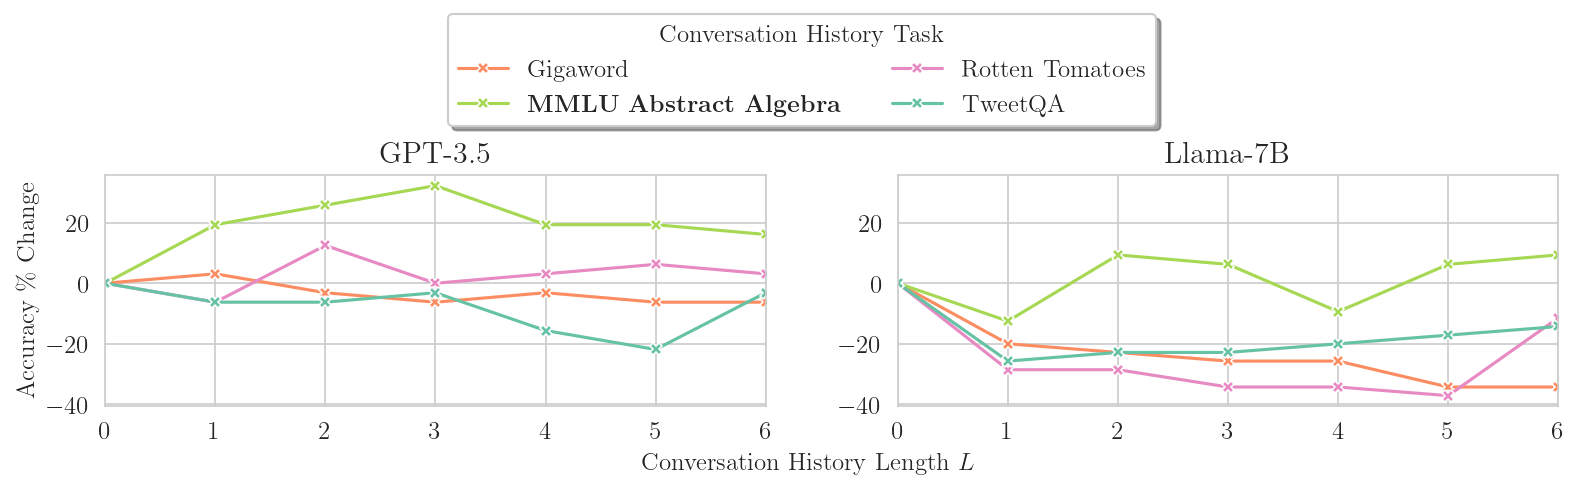

In [5]:
label = r"Accuracy \% Change"
df = aa_results_df.rename(columns={"acc_pct_change": label})
plot_df_metrics_per_model(
  df, 
  [label], 
  # title="MMLU Abstract Algebra Results",
  eval_set="mmluaa",
  legend_anchor=(-0.7, 1.75),
  # adjust_func=lambda axs: axs[0, 0].set_ylim(-7, 4),
  legend_axs=(-1, 1),
  # save_path=Path("mmluaa/conversational_accuracy.pdf"), 
  # save_png=True,
)

### RT

In [8]:
rt_results_df = get_converse_results("rotten_tomatoes", RottenTomatoesDataLoader, ["iterative/converse"], use_cached=True)
rt_results_df.head()

56


,model,incontext_set,num_examples,matches,failed,total,acc,acc_pct_change
0,mistral-7b,gigaword,0,924,1,1066,0.866792,0.000000
1,mistral-7b,gigaword,1,918,3,1066,0.861163,-0.649351
2,mistral-7b,gigaword,2,922,4,1066,0.864916,-0.216450
3,mistral-7b,gigaword,3,927,4,1066,0.869606,0.324675
4,mistral-7b,gigaword,4,932,6,1066,0.874296,0.865801


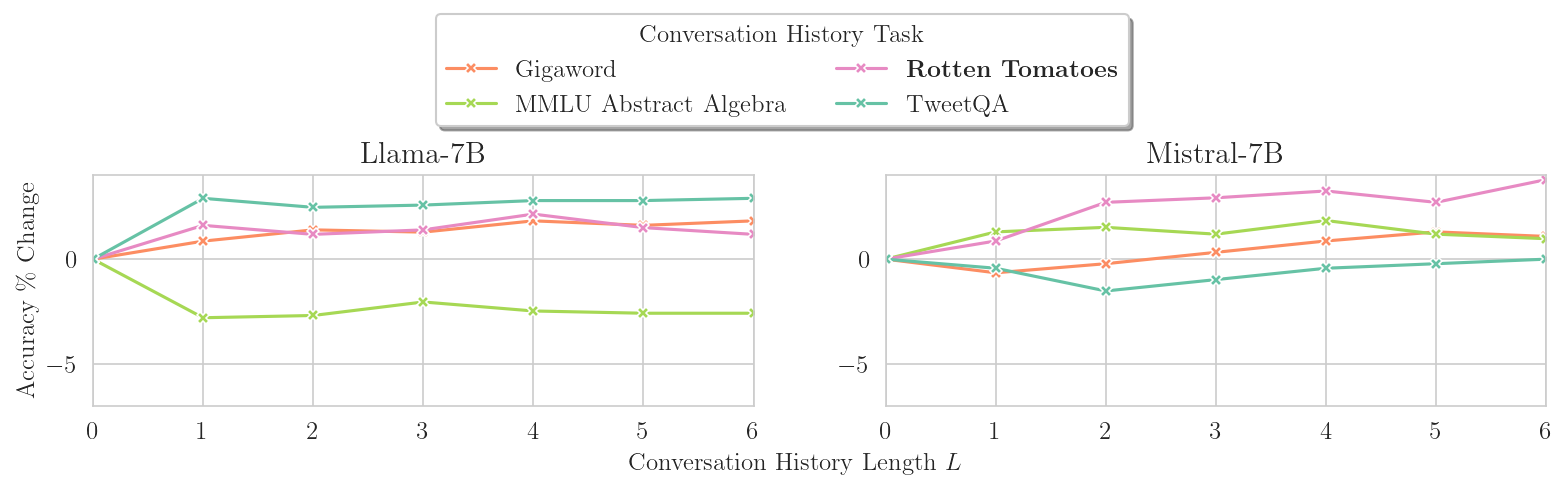

In [9]:
label = r"Accuracy \% Change"
df = rt_results_df.rename(columns={"acc_pct_change": label})
plot_df_metrics_per_model(
  df, 
  [label], 
  # title="MMLU Abstract Algebra Results",
  eval_set="rotten_tomatoes",
  legend_anchor=(-0.7, 1.75),
  adjust_func=lambda axs: axs[0, 0].set_ylim(-7, 4),
  legend_axs=(-1, 1),
  # save_path=Path("rt/conversational_accuracy.pdf"), 
  # save_png=True,
)

### Human Ageing

In [6]:
ha_converse_results_df = get_converse_results("mmlu-age", MMLUHumanAgingDataLoader, ["iterative/converse"], use_cached=True)
ha_converse_results_df.head()

Removing large training set examples
Original training set size:  28
New Training set size:  28
56


,model,incontext_set,num_examples,matches,failed,total,acc,acc_pct_change
0,mistral-7b,gigaword,0,124,0,223,0.556054,0.000000
1,mistral-7b,gigaword,1,121,1,223,0.542601,-2.419355
2,mistral-7b,gigaword,2,121,1,223,0.542601,-2.419355
3,mistral-7b,gigaword,3,129,0,223,0.578475,4.032258
4,mistral-7b,gigaword,4,122,1,223,0.547085,-1.612903


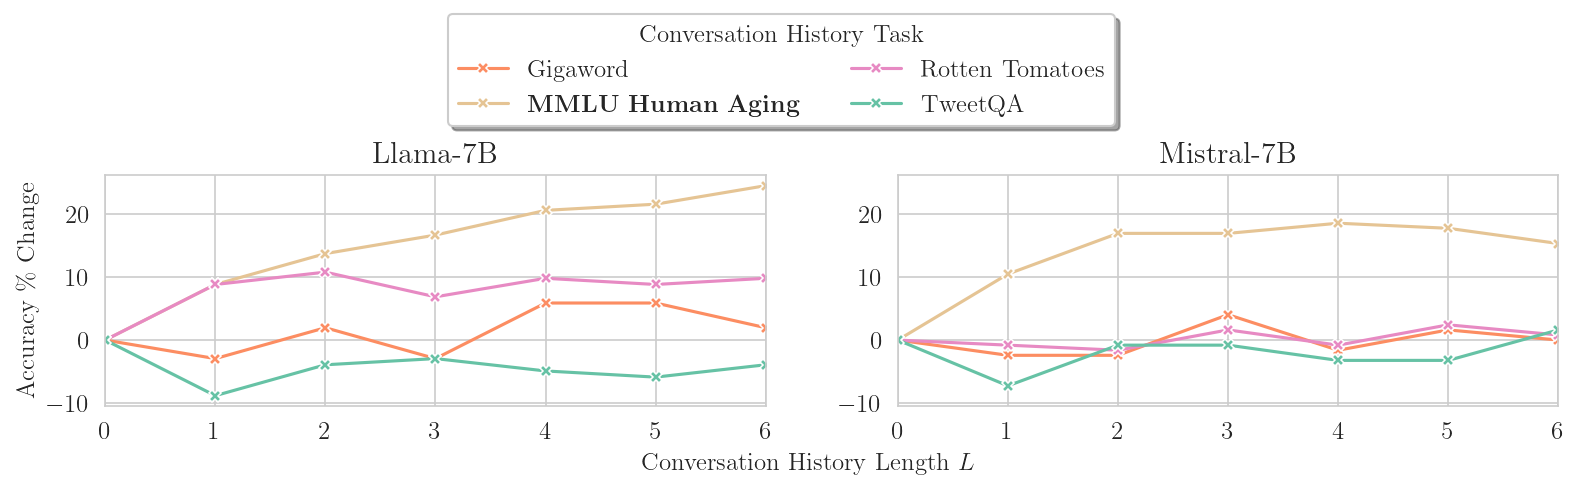

In [7]:
label = r"Accuracy \% Change"
df = ha_converse_results_df.rename(columns={"acc_pct_change": label})
plot_df_metrics_per_model(
  df, 
  [label], 
  save_path=Path("mmlu-age/conversational_accuracy.pdf"),
  # title="MMLU Abstract Algebra Results",
  eval_set="mmlu-age",
  legend_anchor=(-0.7, 1.75),
  # adjust_func=lambda axs: axs[0, 0].set_ylim(-7, 4),
  legend_axs=(-1, 1),
  # save_png=True,
)